# Facial Landmark Detection using OpenCV
---
We will learn about detecting facial landmarks using the OpenCV's Facemark API to detect and plot the facial landmark points onto the image.

Again the facial landmark detection will be done in two steps:

###Face Detection
First we will be detecting the faces in the image on which the landmark prediction will be done. For this we will be using a pretrained deep neural network model.

###Landmark Detection
Once the faces are detected, the landmarks prediction is performed on the region enclosed by the bounding box for each face to give us 68 points for the faces detected by the face detector.

##Code
In this section, we will go through step by step over the process of facial landmark detection.

####Imports and notebook configurations

In [ ]:
if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/qa8l3ixwfnael53/AABaRgCQjwUuC2wbWBUaYfUEa?dl=1 -O code.zip -q --show-progress
    !unzip -qq code.zip
else:
    pass

code.zip            100%[===================>]  72.64M  12.2MB/s    in 7.0s    
mapname:  conversion of  failed


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [18]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0,10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [19]:
# Landmark model location
PREDICTOR_PATH = "lbfmodel.yaml"

#Cascade file location
MODEL_PATH = "opencv_face_detector_uint8.pb"
CONFIG_PATH = "opencv_face_detector.pbtxt"

####Initialize the face detector network

We use the pretrained tensorflow model along with the config file to intialize the face detector.

In [20]:
# Get the face detector network instance
faceDetectorNet = cv2.dnn.readNetFromTensorflow(MODEL_PATH,CONFIG_PATH)

####Initialize the landmark detector
We create an instance of `createFacemarkLBF` class implementing the local binary feature algorithm for feature detection and
Load a pretrained detection model in it.

In [21]:
# Create the landmark detector instance
landmarkDetector = cv2.face.createFacemarkLBF()
landmarkDetector.loadModel(PREDICTOR_PATH)

####Read image

In [23]:
# Read image
image_filename = "obama.jpg"
img = cv2.imread(image_filename)

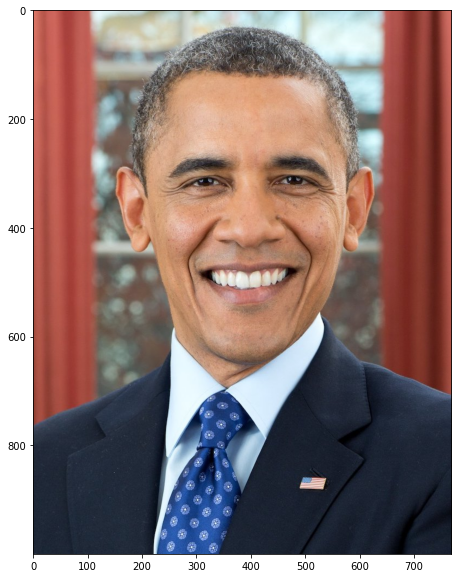

In [24]:
plt.imshow(img[:,:,::-1])
plt.show()

####Detect faces
The network accepts a blob as an input, so first, we need to convert the image to a blob and set it as the input for the network. 

For this we use the  `blobFromImage` funtion with inputs:

`image` -	input image (with 1-, 3- or 4-channels).

`scalefactor` - multiplier for image values.

`size` - spatial size for output image.

`mean` -	scalar with mean values which are subtracted from channels. Values are intended to be in (mean-R, mean-G, mean-B) order if image has BGR ordering and swapRB is true.
(used for normalizing the channels)

`swapRB` - flag which indicates that swap first and last channels in 3-channel image is necessary.

`crop` - flag which indicates whether image will be cropped after resize or not

`ddepth` - Depth of output blob. Choose CV_32F or CV_8U.

Then we perform a forward pass on the network to get the detections for the bonding boxes enclosing the faces in the image.

In [25]:
blob = cv2.dnn.blobFromImage(img, 1.0, (300, 300), [104, 117, 123])
faceDetectorNet.setInput(blob)
detections = faceDetectorNet.forward()

In [26]:
#set minimum confidence to filter out faces with low confidence
confidence_threshold = 0.70

img_height = img.shape[0]
img_width = img.shape[1]

faces=[]

In [27]:
for detection in detections[0,0]:
  if detection[2] >= confidence_threshold:
    left = detection[3] * img_width
    top = detection[4] * img_height
    right = detection[5] * img_width
    bottom = detection[6] * img_height
    bb_width = right-left
    bb_height = bottom-top
    face_bb = (int(left), int(top), int(bb_width), int(bb_height))
    faces.append(face_bb)

In [28]:
faces = np.array(faces)
print(f"Number of faces found: {len(faces)}")

Number of faces found: 1


####Visualize the detected faces
We visualize the detected faces by drawing a bounding box around them to verify the detection results.

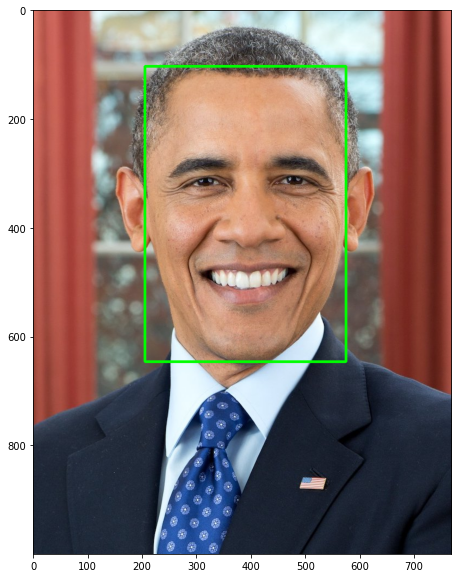

In [29]:
temp_img = img.copy()

for face in faces:
  cv2.rectangle(temp_img,face,(0,255,0),3)

plt.imshow(temp_img[:,:,::-1])
plt.show()

####Detect landmarks
The landmark detector requires two inputs:

`image` - The image with the faces for the which the landmarks are to be detected

`faces` - The array of faces containing the bounding boxes for each face.

In [30]:
retval,landmarks = landmarkDetector.fit(img, faces)

####Draw landmarks points on the image
Unlike DLib, where we need to write our own function to render the detected landmark points onto the image, OpenCV's face class has a built in `drawFacemarks` function to easily draw the landmark points.

In [31]:
for landmark in landmarks:
  cv2.face.drawFacemarks(img,landmark)

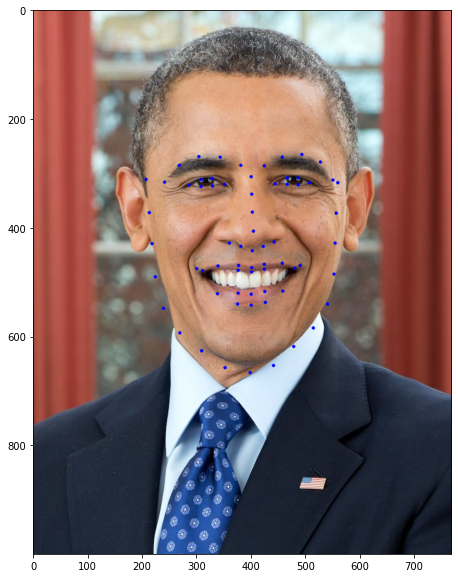

In [32]:
plt.imshow(img[:,:,::-1])
plt.show()